In [2]:
%load_ext autoreload
%autoreload 2

%pylab inline
import sys, fiona
sys.path.append("../")
sys.path.insert(0,"/home/luca/Code/topojson.git/")
import mappy
import geopandas

from mappy.mappy_logging import logger as log
import logging

Populating the interactive namespace from numpy and matplotlib


In [3]:
infile = "/home/luca/Code/mappy.git/input_data/build_map.gpkg"
layer_name  = "geomap"
column_name="unit_name"

# infile = "/home/luca/Code/mappy.git/input_data/test_map.gpkg"
# layer_name  = "test_map"
# column_name="name"


infile = "/data/SciDataHub/projects/map_validation/PM-MOO-MS-SPAApollo_01.gpkg"
layer_name= "subregion_fixed"
column_name="Unit_Code"

# infile = "/home/luca/geomap.gpkg"
# layer_name = "geomap"
# column_name = "Unit_name"


# infile = "/data/SciDataHub/projects/map_validation/PM-MOO-MS-SPAApollo_01_2.gpkg"
# layer_name= "subregion_fixed"
# column_name="Unit_Code"



In [4]:

log.setLevel(logging.DEBUG)

In [5]:
polygons = geopandas.read_file(infile, layer=layer_name)
polygons.geometry = polygons.buffer(0) # buffer trick
polygons = mappy.explode_multipolygons(polygons)
polygons = mappy.remove_null_geometries(polygons) 
polygons =  mappy.remove_truly_duplicated_geometries(polygons)

polygons.reset_index(inplace=True)

In [6]:
mappy.delete_small_polygons(polygons, 1e-6)

0

In [7]:

import topojson
# tj = topojson.Topology(polygons,prequantize=False,topoquantize=True, shared_coords=False, toposimplify=True, presimplify=False)
tj = topojson.Topology(polygons, prequantize=1e4, shared_coords=False,)

tj = tj.toposimplify(10)
asgdf = tj.to_gdf()
asgdf.to_file("topojsoned.gpkg", layer="topojsoned", driver="GPKG")

/usr/lib/python3.8/site-packages/numpy/core/shape_base.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  ary = asanyarray(ary)
/home/luca/Code/topojson.git/topojson/ops.py:544: ShapelyDeprecationWarning: Setting the 'coords' to mutate a Geometry in place is deprecated, and will not be possible any more in Shapely 2.0
  ls.coords = ls_xy[bool_slice]
/home/luca/Code/topojson.git/topojson/core/topology.py:452: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  result.output["arcs"] = simplify(


In [8]:
pols= mappy.topojson_to_objects(tj)

In [9]:
# topojson.Topology?

In [10]:
aa = None
for p in pols:
    if p.has_holes():
        if p.get_number_of_holes() == 19:
            aa = p

In [11]:
aa

Polygon(exterior=[-DirArc_896, -DirArc_897, +DirArc_1131, -DirArc_898, +DirArc_1129, -DirArc_899, -DirArc_900, -DirArc_901, -DirArc_902, +DirArc_1125, -DirArc_903, +DirArc_1196, -DirArc_904, +DirArc_1194, -DirArc_905, -DirArc_906, -DirArc_907, -DirArc_908, +DirArc_1190, -DirArc_909, -DirArc_910, +DirArc_1188, -DirArc_911, -DirArc_912, -DirArc_913, -DirArc_914, -DirArc_915, -DirArc_916, -DirArc_917, -DirArc_918, -DirArc_919, -DirArc_920, -DirArc_921, -DirArc_922, -DirArc_923, -DirArc_924, -DirArc_925, -DirArc_926, -DirArc_927, -DirArc_928, -DirArc_929, -DirArc_930, -DirArc_931, -DirArc_932, -DirArc_933, -DirArc_934, -DirArc_935, -DirArc_936, -DirArc_937, -DirArc_938, -DirArc_939, -DirArc_940, -DirArc_941, -DirArc_942, -DirArc_943, -DirArc_944, -DirArc_945, -DirArc_946, -DirArc_947, -DirArc_948, -DirArc_949, -DirArc_950, -DirArc_951, -DirArc_952, -DirArc_953, -DirArc_954, -DirArc_955, -DirArc_956, -DirArc_957, -DirArc_958, -DirArc_959, -DirArc_960, -DirArc_961, -DirArc_962, -DirArc_963, 

In [12]:
arcs  = pols.get_all_arcs()


In [13]:
out_e = pols.get_exterior_arcs()

In [14]:
import itertools

In [15]:
a = arcs.pop()
b = arcs.pop()

In [16]:
a = a.real_points
b = b.real_points

In [17]:
a.distance_frechet(b)

AttributeError: 'numpy.ndarray' object has no attribute 'distance_frechet'

In [ ]:
out = []
pairs = []
for a, b in  itertools.combinations(out_e, 2):
    try:
        dd = a.distance_frechet(b)
        print(dd)
    except:
        pass
                                                                
        
out = set(out)

In [106]:
a,b = pairs[0]

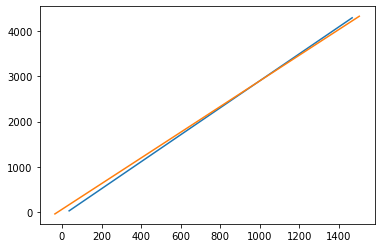

In [107]:
plot(*a.points.T)
plot(*b.points.T)

In [111]:
# import frechetdist
# frechetdist.frdist?

In [108]:
aa = [o.as_shapely() for o in out]
geopandas.GeoDataFrame(geometry=aa).to_file("similar.gpkg", driver="GPKG")

In [84]:
lines = []
for o in out:
    lines.append(o.as_shapely())
    
asg = geopandas.GeoDataFrame(geometry=lines)


In [85]:
asg.to_file("lines.gpkg", driver="GPKG")

In [34]:
arc = pols[0].exteriaor[0]
type(arc)

mappy.tjson.DirectedArc

In [39]:
def get_endpoints(self):
    return self.arc.points

get_endpoints(arc)

array([[795813183651, 181257983835],
       [  5195153126,   1305588743],
       [  5772337481,   1194738376],
       [  4028304453,   -679736911],
       [  3366486814,   -237341831],
       [  3363539560,   2283977272],
       [  2849595680,   2385655159],
       [  1423430799,   2752996801],
       [  1739128356,   4257412290],
       [  -482752736,   3023212123],
       [    32781362,   4181451288],
       [   879766867,   3190763371],
       [   989260225,   4378347132],
       [   453915305,   4948460943],
       [  -556716725,   3560321781],
       [ -1803866846,   4114759035],
       [ -3357176159,   1966536932],
       [  -793693295,   2978610096],
       [ -1440678701,   1695922772],
       [ -3540687130,    647544575]])

/home/luca/.local/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/home/luca/.local/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<AxesSubplot:>

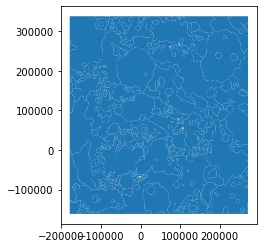

In [11]:
rpols = [p.as_shapely() for p in pols]

geopandas.GeoDataFrame(geometry=rpols).plot()

In [21]:
from typing import List
from mappy import Arc



In [24]:

#     polygons = 
    

In [16]:
pols[10].arcs


[array([[Arc(id=757), True],
        [Arc(id=758), True]], dtype=object)]

In [23]:
tj

Topology(
{'arcs': [[[179662.80980395028, -71142.39674560628],
           [178330.10923939268, -71705.71129516476],
           [176982.6380306055, -72467.48679667497]],
          [[-97613.9235167489, 322817.49863394664],
           [-96920.62950050631, 322568.90884386824],
           [-94964.14007029374, 320959.5375233989]],
          [[40734.38777706477, 259396.69346053447],
           [39068.62906249243, 259813.6419513682]],
          [[39068.62906249243, 259813.6419513682],
           [37908.66095347713, 261007.33968956664]],
          [[271634.913906439, -51704.4540471045],
           [271634.913906439, -66001.9599221333]],
          [[268797.18313509796, -61479.94493959067],
           [268151.2378229753, -59929.904051682985],
           [267947.52381139377, -58110.18561580479]],
          [[269667.1650874975, -54749.306157223284],
           [270459.4811131793, -52003.18262297941],
           [271634.913906439, -51704.4540471045]],
          [[-91291.8645301412, 160967.8701154303

In [16]:
import itertools

In [27]:
thresh = 10

In [29]:
from shapely.geometry import Point

In [31]:
for i,j in itertools.combinations(np.arange(len(arcs)), 2):
    a = arcs [i]
    b = arcs[j]
    
    
    distances = [b.as_shapely().distance(Point(p)) for p in a.get_points()]

In [32]:
distances

[793.9806009666886, 0.0]

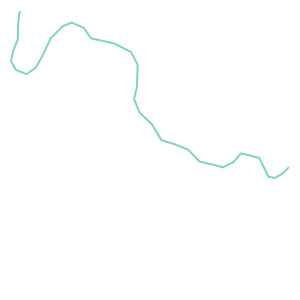

In [26]:
b.as_shapely()

In [ ]:
tj.output["arcs"]

In [10]:
narcs = len(tj.output["arcs"])
# ids = 
print(narcs)


for i, j in itertools.combinations(np.arange(narcs), 2):
    a = np.array(tj.output["arcs"][i])
    b = np.array(tj.output["arcs"][j])
    
    
#     print (a)

1574


In [6]:
def extract_vertices(polygons: geopandas.GeoDataFrame):
    out = []
    for pol in polygons.geometry:

        out.append(np.array(pol.exterior))

        for i in pol.interiors:
            out.append(np.array(i))
            
    return np.row_stack(out)

In [7]:
verts = extract_vertices(polygons)

<ipython-input-7-3c8102ebc415>:1: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  verts = extract_vertices(polygons)


In [8]:
from shapely.strtree import STRtree

In [9]:

from scipy.spatial import cKDTree

In [10]:
tree = cKDTree(verts)

In [22]:
tdist = 200

for i, p in enumerate(verts):
    found = tree.query_ball_point(p, tdist)
#     print(found)
#     found.remove(i)
    if len(found) <= 1:
        continue
        
    if 24793 not in found:
        continue
    
    if np.all(verts[found[0]] == p):
        print(f"same {found}")

same [814, 835, 24833, 24793]
same [814, 835, 24833, 24793]
same [814, 835, 24833, 24793]
same [814, 835, 24833, 24793]


In [33]:
tree.query_ball_point?

Docstring:
query_ball_point(self, x, r, p=2., eps=0)

Find all points within distance r of point(s) x.

Parameters
----------
x : array_like, shape tuple + (self.m,)
    The point or points to search for neighbors of.
r : array_like, float
    The radius of points to return, shall broadcast to the length of x.
p : float, optional
    Which Minkowski p-norm to use.  Should be in the range [1, inf].
    A finite large p may cause a ValueError if overflow can occur.
eps : nonnegative float, optional
    Approximate search. Branches of the tree are not explored if their
    nearest points are further than ``r / (1 + eps)``, and branches are
    added in bulk if their furthest points are nearer than
    ``r * (1 + eps)``.
n_jobs : int, optional
    Number of jobs to schedule for parallel processing. If -1 is given
    all processors are used. Default: 1.
return_sorted : bool, optional
    Sorts returned indicies if True and does not sort them if False. If
    None, does not sort single poin